In [305]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [306]:
xVals = [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]

xLinspace = np.linspace(1, 32768, 32768)

twoDy = [7.66, 10.67, 15, 21.04, 29.74, 41.85, 59.03, 83.19, 117.59]

threeDy = [17.57, 27.4, 43.23, 67.87, 107.49, 168.7, 267.48, 421.55, 667.54]

fourDy = [28.34, 46.91, 77.49, 130.55, 216.76, 362.33, 603.46, 1011.44, 1684.32]

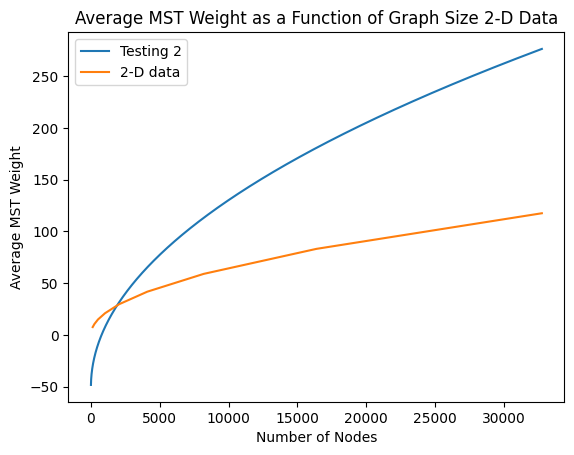

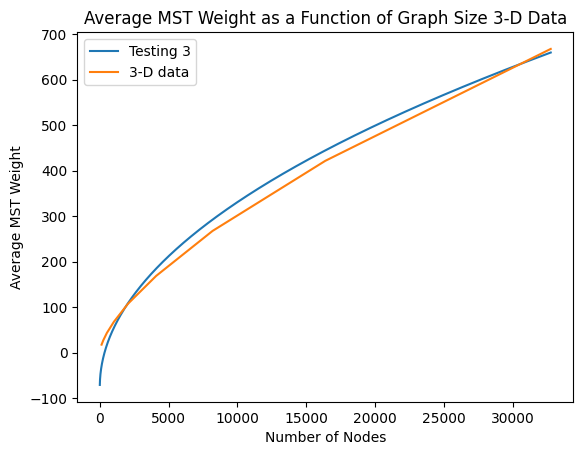

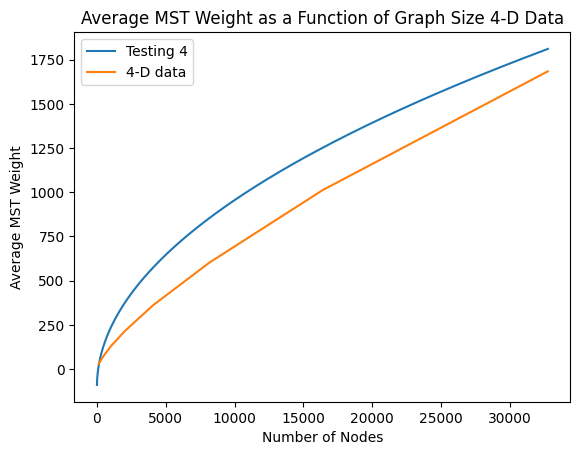

In [307]:
i = 2
for y in [twoDy, threeDy, fourDy]:
    Fn = np.sqrt((i ** (0.85 * i)) * xLinspace) - (25 * i)
    
    
    plt.plot(xLinspace, Fn, label=f"Testing {i}")
    plt.plot(xVals, y, label=f"{i}-D data")
    plt.xlabel("Number of Nodes")
    plt.ylabel("Average MST Weight")
    plt.title(f"Average MST Weight as a Function of Graph Size {i}-D Data")
    plt.legend()
    plt.show()
    i += 1
    

/var/folders/bp/_nc0xgxd3znbr_08vbn0f08c0000gn/T/ipykernel_80093/3617656058.py:7: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
/var/folders/bp/_nc0xgxd3znbr_08vbn0f08c0000gn/T/ipykernel_80093/3617656058.py:11: RuntimeWarning: invalid value encountered in sqrt
  return a * np.sqrt(b * x) + c


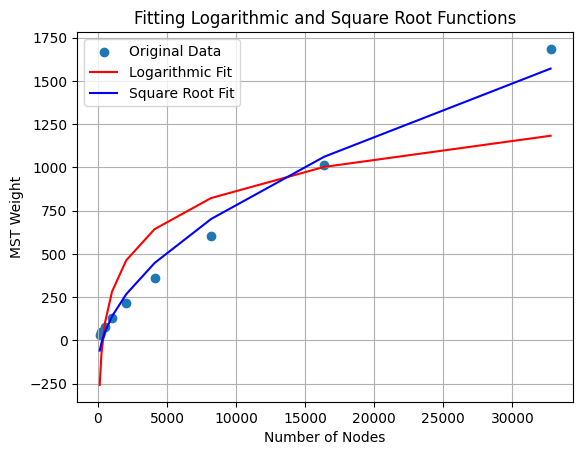

Parameters of the logarithmic fit: [ 2.59714683e+02  7.66733928e-02 -8.50827280e+02]
Parameters of the square root fit: [   4.64165293    4.2819243  -168.02750232]


In [308]:
# Given data points
xVals = np.array([128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768])
fourDy = np.array(fourDy)

# Define the logarithmic function
def log_function(x, a, b, c):
    return a * np.log(b * x) + c

# Define the square root function
def sqrt_function(x, a, b, c):
    return a * np.sqrt(b * x) + c

# Perform curve fitting for logarithmic function
popt_log, pcov_log = curve_fit(log_function, xVals, fourDy)

# Perform curve fitting for square root function
popt_sqrt, pcov_sqrt = curve_fit(sqrt_function, xVals, fourDy)

# Generate y values using the fitted functions
fourDy_pred_log = log_function(xVals, *popt_log)
fourDy_pred_sqrt = sqrt_function(xVals, *popt_sqrt)

# Plot the original data and the fitted curves
plt.scatter(xVals, fourDy, label='Original Data')
plt.plot(xVals, fourDy_pred_log, color='red', label='Logarithmic Fit')
plt.plot(xVals, fourDy_pred_sqrt, color='blue', label='Square Root Fit')
plt.xlabel('Number of Nodes')
plt.ylabel(f'MST Weight')
plt.title('Fitting Logarithmic and Square Root Functions')
plt.legend()
plt.grid(True)
plt.show()

# Print the parameters of the fitted functions
print("Parameters of the logarithmic fit:", popt_log)
print("Parameters of the square root fit:", popt_sqrt)
